In [135]:
# data processing
import pandas as pd

#linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.metrics import classification_report 

import warnings
warnings.filterwarnings("ignore")

In [136]:
# reading training data from feature engineering
df_train=pd.read_csv("Train_data.csv")
df_train

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Redeem_date,Original_Price,...,No_of_buys,Coupon_sent_count,Coupon_redeem_count_y,Merchant_Redeem_Sent_Ratio,U_M_sent,U_M_redeem,U_M_crr,Merchant_No_of_buys,Merchant_avg_distance,ActiveDuration_y
0,0,4,1433,8735.0,30:5,10.000000,2016-02-14,NaN,-1.0,30.0,...,0,19900,726,0.036482,1,0,0.0,726,5.187776,164
1,1,236,1433,8735.0,30:5,0.000000,2016-02-11,NaN,-1.0,30.0,...,0,19900,726,0.036482,1,0,0.0,726,5.187776,164
2,2,318,1433,8735.0,30:5,6.000000,2016-02-14,NaN,-1.0,30.0,...,0,19900,726,0.036482,1,0,0.0,726,5.187776,164
3,3,327,1433,8735.0,30:5,3.000000,2016-02-12,NaN,-1.0,30.0,...,0,19900,726,0.036482,1,0,0.0,726,5.187776,164
4,4,2384,1433,9476.0,20:5,10.000000,2016-01-25,NaN,-1.0,20.0,...,0,19900,726,0.036482,1,0,0.0,726,5.187776,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015384,1015384,7335410,1477,11724.0,30:1,3.281054,2016-05-16,2016-05-26,10.0,30.0,...,2,4,2,0.500000,4,2,0.5,2,3.281054,7
1015385,1015385,7335410,1477,11724.0,30:1,3.281054,2016-05-22,NaN,-1.0,30.0,...,2,4,2,0.500000,4,2,0.5,2,3.281054,7
1015386,1015386,7335410,1477,11724.0,30:1,3.281054,2016-05-29,NaN,-1.0,30.0,...,2,4,2,0.500000,4,2,0.5,2,3.281054,7
1015387,1015387,7337925,2779,8316.0,50:5,10.000000,2016-05-16,NaN,-1.0,50.0,...,1,2,1,0.500000,2,1,0.5,1,10.000000,21


In [109]:
df_train.columns

Index(['Unnamed: 0', 'User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate',
       'Distance', 'Date_received', 'Date', 'Redeem_date', 'Original_Price',
       'Discounted_price', 'Rate', 'Target', 'Coupon_receive_count',
       'Coupon_redeem_count_x', 'User_Redeem_Receive_Ratio',
       'User_avg_distance', 'ActiveDuration_x', 'No_of_buys',
       'Coupon_sent_count', 'Coupon_redeem_count_y',
       'Merchant_Redeem_Sent_Ratio', 'U_M_sent', 'U_M_redeem', 'U_M_crr',
       'U_M_No_of_visits', 'U_M_Dist', 'Merchant_No_of_buys',
       'Merchant_avg_distance', 'ActiveDuration_y'],
      dtype='object')

In [130]:
 feature_names=['Distance', 'Original_Price',
        'Discounted_price', 'Rate', 'Coupon_receive_count',
        'Coupon_redeem_count_x', 'User_Redeem_Receive_Ratio', 'User_avg_distance','ActiveDuration_x','No_of_buys','Coupon_sent_count',
       'Coupon_redeem_count_y','Merchant_Redeem_Sent_Ratio','U_M_sent', 'U_M_redeem', 'U_M_crr']

X = df_train[feature_names]

Y = df_train['Target']

In [131]:
X

,Distance,Original_Price,Discounted_price,Rate,Coupon_receive_count,Coupon_redeem_count_x,User_Redeem_Receive_Ratio,User_avg_distance,ActiveDuration_x,No_of_buys,Coupon_sent_count,Coupon_redeem_count_y,Merchant_Redeem_Sent_Ratio,U_M_sent,U_M_redeem,U_M_crr
0,10.000000,30.0,5.0,0.833,2,0,0.0,10.000000,2,0,19900,726,0.036482,1,0,0.0
1,0.000000,30.0,5.0,0.833,4,0,0.0,0.500000,3,0,19900,726,0.036482,1,0,0.0
2,6.000000,30.0,5.0,0.833,1,0,0.0,6.000000,1,0,19900,726,0.036482,1,0,0.0
3,3.000000,30.0,5.0,0.833,3,0,0.0,3.000000,2,0,19900,726,0.036482,1,0,0.0
4,10.000000,20.0,5.0,0.750,5,0,0.0,10.000000,1,0,19900,726,0.036482,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015384,3.281054,30.0,1.0,0.967,5,2,0.4,3.281054,4,2,4,2,0.500000,4,2,0.5
1015385,3.281054,30.0,1.0,0.967,5,2,0.4,3.281054,4,2,4,2,0.500000,4,2,0.5
1015386,3.281054,30.0,1.0,0.967,5,2,0.4,3.281054,4,2,4,2,0.500000,4,2,0.5
1015387,10.000000,50.0,5.0,0.900,2,1,0.5,10.000000,2,1,2,1,0.500000,2,1,0.5


## Train test split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=False)

In [133]:
def feature_importance(clf,train_X):
    feat_importances = pd.Series(clf.feature_importances_, index=train_X.columns).sort_values(ascending=True)
    feat_importances.plot(kind='barh',figsize=(7,7))

# Model

## Logistic Regression 

Confusion Matrix :

[[188795   1913]
 [  4127   8243]]

______________________________________________________


Accuracy Score : 0.9702577334817164

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    190708
           1       0.81      0.67      0.73     12370

    accuracy                           0.97    203078
   macro avg       0.90      0.83      0.86    203078
weighted avg       0.97      0.97      0.97    203078


______________________________________________________

ROC AUC Score of Probailities:  0.975
ROC AUC Curve


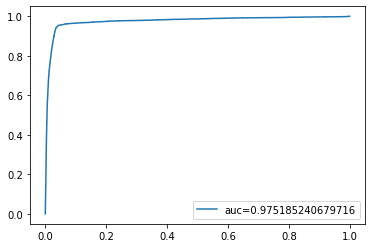

In [134]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.5 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()


## SGD Classifier

Confusion Matrix :

[[140833  49875]
 [  2079  10291]]

______________________________________________________


Accuracy Score : 0.7441672657796512

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.99      0.74      0.84    190708
           1       0.17      0.83      0.28     12370

    accuracy                           0.74    203078
   macro avg       0.58      0.79      0.56    203078
weighted avg       0.94      0.74      0.81    203078


______________________________________________________

ROC AUC Score of Probailities:  0.808
ROC AUC Curve


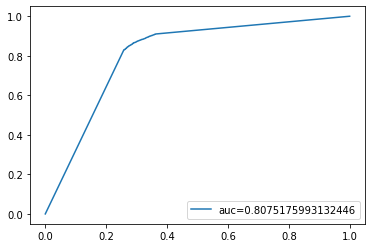

In [106]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log", penalty="l2")
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree

Confusion Matrix :

[[187400   3139]
 [  4287   8252]]

______________________________________________________


Accuracy Score : 0.9634327696747063

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    190539
           1       0.72      0.66      0.69     12539

    accuracy                           0.96    203078
   macro avg       0.85      0.82      0.84    203078
weighted avg       0.96      0.96      0.96    203078


______________________________________________________

ROC AUC Score of Probailities:  0.89
ROC AUC Curve


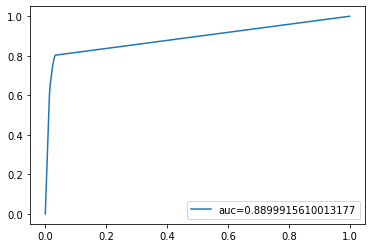

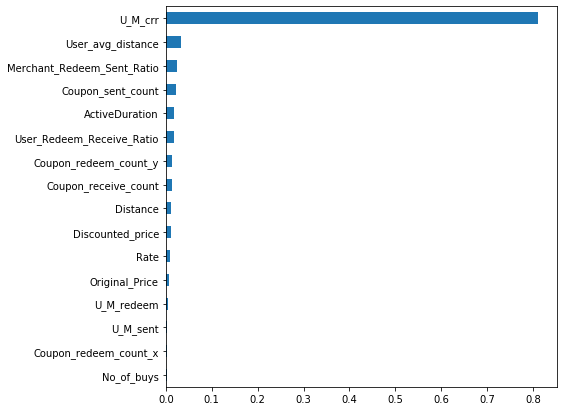

In [76]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

feature_importance(clf,X_train)

## Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

feature_importance(regressor,X_train)

ValueError: Number of features of the model must match the input. Model n_features is 16 and input n_features is 17 

## Light GBM

In [16]:
# import lightgbm as lgb
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# d_train = lgb.Dataset(X_train, label=y_train)
# params = {}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10
# clf = lgb.train(params, d_train, 100)

# #Prediction
# y_pred=clf.predict(X_test)
# #df_off_unique.loc[(df_off_unique["Redeem_date"]<=15) & (df_off_unique["Redeem_date"]>=0), 'Target'] = 1 
# y_pred = (y_pred >= 0.5).astype(int)

# #convert into binary values
# #for i in range(len(y_pred)):
# #    if y_pred[i]>=.5:       # setting threshold to .5
# #        y_pred[i]=1
# #    else:  
# #        y_pred[i]=0

# cm = confusion_matrix(y_test, y_pred)

# print ('Confusion Matrix :')
# print (cm) 
# print ('Accuracy Score :',accuracy_score(y_test, y_pred))
# print ('Report : ')
# print (classification_report(y_test, y_pred))

## XGBoost

Confusion Matrix :

[[189032   1676]
 [  5167   7203]]

______________________________________________________


Accuracy Score : 0.9663035877840042

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    190708
           1       0.81      0.58      0.68     12370

    accuracy                           0.97    203078
   macro avg       0.89      0.79      0.83    203078
weighted avg       0.96      0.97      0.96    203078


______________________________________________________

ROC AUC Score of Probailities:  0.959
ROC AUC Curve


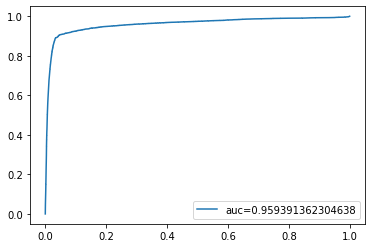


______________________________________________________


Feature importance



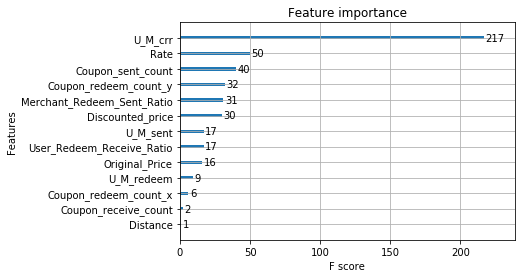

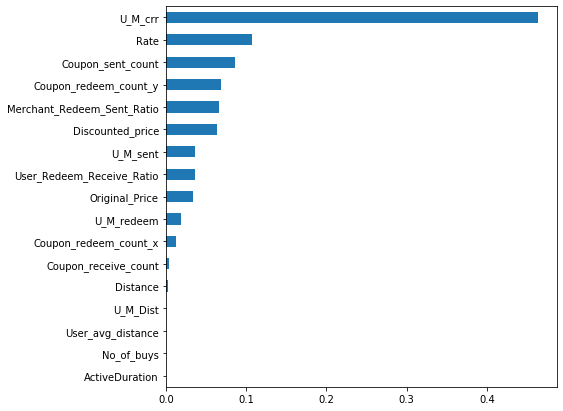

In [107]:
from xgboost import XGBClassifier
from xgboost import plot_importance
#X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=False)

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = logreg.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.5 else 0 for x in y_pred]


results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print ('\n______________________________________________________\n')


print("\nFeature importance\n")
plot_importance(model)
plt.show()
feature_importance(model,X_train)

## SVM

In [18]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)
# y_pred = svm.predict_proba(X_test)[:,1].tolist()
# y_values = [1 if x>0.50 else 0 for x in y_pred]

# results = confusion_matrix(y_test, y_values) 
# print ('Confusion Matrix :')
# print(results) 
# print ('Accuracy Score :',accuracy_score(y_test, y_values))
# print ('Report : ')
# print (classification_report(y_test, y_values))


# #roc curve
# roc_score = round(roc_auc_score(y_test, y_pred), 3)
# print('\n\nROC AUC Score of Probailities:  '+ str(roc_score))
# print('ROC AUC Curve')
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, y_pred)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.show()